<a href="https://colab.research.google.com/github/Green0v0/Algorithm/blob/main/Isomap%2C%20%EC%A7%80%EC%97%AD%EC%A0%81%20%EC%84%A0%ED%98%95%20%EC%9E%84%EB%B2%A0%EB%94%A9(LLE).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **손실 압축과 매니폴드 학습**

### 손실 압축 : **"덜 중요한 요소를 먼저 버린다"**

손실 압축은 정보를 잃기만 하는 것이 아니라 유용한 요소들을 훨씬 더 이용하기 쉽도록 정보를 가공하는 역할도 합니다.

어떤 정보가 주어졌을 때 **정말로 중요하고 본질적인 요소들은 겉으로 드러나있지 않기 때문**입니다. 즉, 정보의 '표현형'(representation)은 대상의 본질에 대한 피상적, 부분적, 간접적인 요소들로만 이루어져 있는 경우가 대부분입니다. 예를 들어,



- **고객 정보**는 대개 다음과 같은 요소들로 표현됩니다: 신상정보(나이, 주소 등), 취미와 관심사(고객이 직접 입력한), 각종 활동 기록들(구매한 상품들의 목록 등). 하지만 이런 요소들은 그 고객의 본질적인 특성, 즉, **구매 성향**이라든지, 그 고객이 **진짜로 관심있어하는 상품의 종류**, 이런 것들을 직접적으로 보여주지는 못합니다.



즉, 주어진 정보의 겉표면을 이루는 자질구레한 요소들을 전부 잘라내고**(= 손실)**, 본질적인 요소를 밖으로 드러내는 것**(= 가공)**, 이것이 바로 손실 압축의 원리이자 의의라고 할 수 있습니다.

(또한, 주어진 정보 속에 숨어있는 중요하고 의미있는 요소들을 끄집어낸다는 점에서, 손실 압축은 데이타 마이닝(data mining) 및 지식 추출(knowledge discovery)같은 분야와도 맞닿아있다고 할 수 있습니다.)

출처: https://markov.tistory.com/39?category=116033 [Intelligent IF]

### 매니폴드(manifold)

두 점 사이의 거리 혹은 유사도가 **근거리에서는 유클리디안(Euclidean metric, 직선 거리)**을 따르지만 **원거리에서는 그렇지 않은 공간**을 말합니다.

![대체 텍스트](http://cfs4.tistory.com/upload_control/download.blog?fhandle=YmxvZzEwNjMwMUBmczQudGlzdG9yeS5jb206L2F0dGFjaC8wLzEwMDAwMDAwMDAwMy5qcGc%3D)

밑의 그림처럼 2차원 공간상에 분포한 데이터를 보겠습니다.

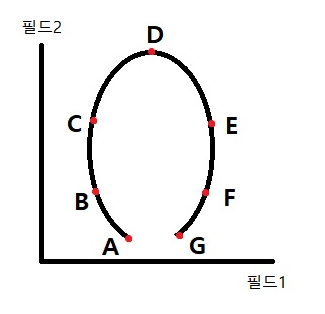

직선 거리상으로는(유클리디안 거리상으로는), A와 C사이의 거리가 A와 G사의 거리보다 훨씬 큽니다.
**(A<->C $>$ A<->G)**


하지만, **만약 위의 데이타가 사실은 아래의 1차원 공간(즉, 직선)을 구부려서 2차원 상에 올려놓은 것에 불과하다면** 어떨까요?

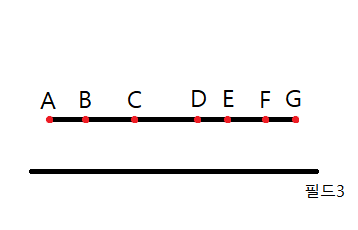

만약 그렇다면, A와 C 사이의 거리는 A와 G 사이의 거리보다 더 작아야 합니다. 이러한 멀고 가까움(distance measure)은 이 공간을 <그림 1>처럼 뒤틀어놓았다고 해도 그대로 유지되어야 하는 것입니다..


따라서, <그림 1>에서는 두 점 사이의 거리를 잴 때 유클리디안 거리를 쓰면 안 되는 거죠. A와 B, D와 E, F와 G 처럼, 공간을 다소 비틀어도 거리의 변화가 거의 없을 정도로 충분히 가까운 점들에 대해서만 예외적으로 유클리디안 거리를 허용하는 거구요.

**즉, 근거리에서는 유클리디안이지만 전체적으로는 비유클리디안, 이것이 바로 매니폴드입니다.**



반면, <그림 2>의 경우는 공간 전체가 하나의 유클리디안 공간이 되므로, 여기서는 점들이 서로 멀든 가깝든 항상 직선 거리를 쓸 수 있습니다.

거리 재기도 더 쉽고 차원 수(= 필드 개수)도 더 작은 <그림 2>가 더 좋습니다!

### **정리**

- 필드3은 필드1,2보다 **훨씬 본질적인 의미를 잘 함축**한 요소
- 필드3의 각 레코드를 필드1,2의 경우보다 더 작은 개수(1개)의 필드로 나타냅니다. 하지만, 주어진 정보는 본질적으로 전혀 훼손되거나 손실되지 않음.
- (각 레코드는 2차원 벡터 공간상의 한 점으로 표현되지만, 이 점들이 실제로 분포해 있는 공간은 사실 1차원 매니폴드이므로,) 2차원 공간에서 대부분의 영역은 비어있게 됨. 반면 필드3의 그림은 이러한 공간의 낭비가 없기 때문에, **더 작은 개수의 필드로 동등한 수준의 정보**를 표현할 수 있는 것입니다.

# **매니폴드 학습**

**실생활에서 얻는 정보의 형태는 대부분 매니폴드를 띄게 됩니다.**

원래는 서로 특성이 아주 다른 두 레코드 A와 G가, 필드값상으로는 서로 상당히 유사한 관계로 나타난다는 문제가 있었습니다. 즉, **필드값의 차이가 각 개체간의 실제 차이를 제대로 반영하지 못하기 때문에**, 근거리일 때는 괜찮지만 개체간의 차이가 조금만 커져도 통상적인 직선 거리(Euclidean distance)를 쓸 수 없다고 하였습니다.


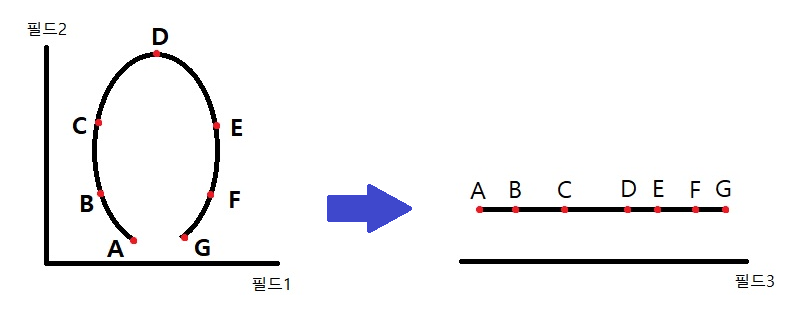

### **목적**
주어진 정보 속의 매니폴드를 두번째 그림처럼 곧게 펴 줌으로써, **개체간의 실제 차이를 제대로 반영할 수 있도록 하는 것**

즉, 매니폴드 학습은 **고차원상에 뒤틀린 상태로 놓여있는 매니폴드로부터 원래의 저차원 유클리디안 공간을 구하는 것**입니다.

# **계산**

- 주어진 정보(고차원)의 차원수 : $d$
- 구하려는 공간(저차원)의 차원수 : $r$

( 즉, $d > r$ )

**$d$개의 필드로 주어진 기존의 데이터들을, 새로운 $r$개의 필드로 나타내는 것**

수집된 레코드(데이터)의 개수가 총 $n$개

즉, $x_1, x_2, ... , x_n$이 $d$치원 벡터로 주어져있고, **우리의 목표는 이들의 $r$차원 벡터인 $z_1, z_2, ... , z_n$을 구하는 것**입니다.

- 조건

(2) ![대체 텍스트](http://latex.codecogs.com/gif.latex?\frac{1}{n}\sum_{i=1}^n%20\mathbf{z}_i%20=%20\mathbf{0}) 평균이 0이니까 즉, ![대체 텍스트](http://latex.codecogs.com/gif.latex?\sum_{i=1}^n%20\mathbf{z}_i%20=%20\mathbf{0})

이때 $z_1, ..., z_n$의 필드값 각각의 평균은 아래와 같이 0이 되도록 합니다.

**공식 도출 과정**

1. 각 변에 대해 제곱

  ![대체 텍스트](http://latex.codecogs.com/gif.latex?||\mathbf{z}_i-\mathbf{z}_j||^2%20=%20d(\mathbf{x}_i,\mathbf{x}_j)^2)

  ![대체 텍스트](http://latex.codecogs.com/gif.latex?\mathbf{z}_i^T\mathbf{z}_i%20-%202\mathbf{z}_i^T\mathbf{z}_j%20+%20\mathbf{z}_j^T\mathbf{z}_j%20=%20d(\mathbf{x}_i,\mathbf{x}_j)^2)


2. $z_i, z_j,\{z_i,z_j\}$ 각각에 대해 1 부터 $n$까지의 합을 대입

  ![대체 텍스트](http://latex.codecogs.com/gif.latex?\mathbf{z}_j^T\mathbf{z}_j%20=%20\frac{1}{n}\Big[%20\sum_{i=1}^n%20d(\mathbf{x}_i,\mathbf{x}_j)^2%20\Big]%20-%20\frac{1}{n}\Big[%20\sum_{i=1}^n%20\mathbf{z}_i^T\mathbf{z}_i%20\Big])

  ![대체 텍스트](http://latex.codecogs.com/gif.latex?\mathbf{z}_i^T\mathbf{z}_i%20=%20\frac{1}{n}%20\Big[%20\sum_{j=1}^n%20d(\mathbf{x}_i,\mathbf{x}_j)^2%20\Big]%20-%20\frac{1}{n}\Big[%20\sum_{j=1}^n%20\mathbf{z}_j^T\mathbf{z}_j%20\Big])

  ![대체 텍스트](http://latex.codecogs.com/gif.latex?\frac{1}{n}\Big[%20\sum_{i=1}^n\mathbf{z}_i^T\mathbf{z}_i%20\Big]%20+%20\frac{1}{n}\Big[%20\sum_{j=1}^n%20\mathbf{z}_j^T\mathbf{z}_j%20\Big]%20=%20\frac{1}{n^2}%20\Big[%20\sum_{i=1}^n\sum_{j=1}^n%20d(\mathbf{x}_i,\mathbf{x}_j)^2%20\Big])

3. 각 식을 연산



$z_i$와 $z_j$의 내적(inner product)을 $x_i$와 $x_j$의 실제 거리 $d(x_i,x_j)$로 표현

![대체 텍스트](http://latex.codecogs.com/gif.latex?\mathbf{z}_i^T\mathbf{z}_j%20=%20-\frac{1}{2}\bigg(%20d_{ij}^2%20-%20\frac{1}{n}\Big[\sum_{i=1}^n%20d_{ij}^2\Big]%20-%20\frac{1}{n}\Big[\sum_{j=1}^n%20d_{ij}^2\Big]%20+%20\frac{1}{n^2}\Big[\sum_{i=1}^n\sum_{j=1}^n%20d_{ij}^2\Big]%20\bigg))


(계산 식 자세히 보려면 [손실 압축과 매니폴드 학습 2: 알고리즘](https://markov.tistory.com/40?category=116033) 참조)

**행렬을 이용하여 간결하게 나타내기**

아래와 같이 정의된 $Z, Δ, H$ 라는 행렬을 도입합니다.

  ![대체 텍스트](http://latex.codecogs.com/gif.latex?\mathbf{Z}%20=%20[\mathbf{z}_1|\mathbf{z}_2|\cdots|\mathbf{z}_n])

  ![대체 텍스트](http://latex.codecogs.com/gif.latex?[\mathbf{\Delta}]_{ij}%20=%20d(\mathbf{x}_i,\mathbf{x}_j)^2)

  ![대체 텍스트](http://latex.codecogs.com/gif.latex?[\mathbf{H}]_{ii}%20=%201%20-%20\frac{1}{n}) ![대체 텍스트](http://latex.codecogs.com/gif.latex?\forall%20i=1,\cdots,n)
  
  ![대체 텍스트](http://latex.codecogs.com/gif.latex?[\mathbf{H}]_{ij}%20=%20-\frac{1}{n})

$Z$는 [$i$번째 열]이 $z_i$가 되도록 하고,

$Δ$는 [$i$번째 행, $j$번째 열]의 원소가 $d(x_i,x_j)$가 되도록 하며,

$H$는 대각선상의 원소들은 $(n-1)/n$, 나머지 원소들은 $-1/n$이 되도록 합니다.

최종적으로 아래와 같은 **관계식을 유도**해낼 수 있습니다.

  ![대체 텍스트](http://latex.codecogs.com/gif.latex?\mathbf{Z}^T\mathbf{Z}%20=%20-\frac{1}{2}\mathbf{H%20\Delta%20H})

= 개체간의 실제거리를 적절히 변환하여 **r차원 공간상의 내적(dot product)**으로 나타낼 수 있다는 의미

### **두 개체의 유사도를 바탕으로 학습한 매니폴드**

임의의 두 개체 $x_i$와 $x_j$가 주어졌을 때 이들의 실제 유사도를 $k(x_i,x_j)$ 라고 정의하고, 수집된 레코드가 총 $n$개일 때 $x_1, ..., x_n$의 유사도 행렬(similarity matrix)을 아래와 같이 $K$라고 나타내겠습니다.



  ![대체 텍스트](http://latex.codecogs.com/gif.latex?[\mathbf{K}]_{ij}%20=%20k(\mathbf{x}_i,\mathbf{x}_j))

- $K$의 [$i$번째 행, $j$번째 열]의 원소가 $k(x_i,x_j)$
- 거리 행렬(dissimilarity matrix) $Δ$와 대비되는 행렬


### **최종 관계식**
(k에 대한 최종 관계식)

![대체 텍스트](http://latex.codecogs.com/gif.latex?\mathbf{Z}^T\mathbf{Z}%20=%20\mathbf{H%20K%20H})

# **매니폴드 학습 알고리즘의 차이점**

행렬 $K$(또는 $Δ$)에 따라 다릅니다. 즉, 각 알고리즘들은 **$d(x_i,x_j)$** 또는 **$k(x_i,x_j)$**를 구하는 방법이 서로 다른 거죠


**실제로 거리나 유사도를 구하는 방법**

- 매니폴드의 모델 식은 물론이거니와 아무런 사전 지식도 없고, **가지고 있는 정보는 $n$개의 레코드**

- 매니폴드의 모양 및 특성을 최대한 비슷하게 재현하기 위해 $x_1,...,x_n$의 그래프를 생성

- $x_1, ..., x_n$ 각각을 노드로 하고, 서로 충분히 가까운 두 노드간에만 링크(edge)가 연결되어 있는 인접 그래프(neighborhood graph)


인접 그래프를 만들 때 **"충분히 가깝다"**라는 기준은 **임의로** 정하면 됩니다.

(xi와의 거리가 특정 값 이하(예를 들어 0.5 이하)인 노드라든지, xi와의 거리가 가장 가까운 몇 개의 노드(예를 들어 5개)라든지... 이때 거리는 그냥 유클리디안 거리를 쓰면 됩니다. 매니폴드의 정의상, 충분히 가까운 점들간에는 실제 거리와 유클리디안 거리가 거의 일치하니까..)


### **인접그래프 구현 예시**

아래 그림은 2차원 평면을 스위스 롤 모양으로 돌돌 말아서 3차원 위에 올려놓은 매니폴드로(따라서 2차원 평면을 복원하는 것이 목적이 되겠죠), 해당 매니폴드에서 약 700개의 점을 추출하여 인접 그래프를 만든 것입니다.

![대체 텍스트](http://cfs4.tistory.com/upload_control/download.blog?fhandle=YmxvZzEwNjMwMUBmczQudGlzdG9yeS5jb206L2F0dGFjaC8wLzEyMDAwMDAwMDAwMC5naWY%3D)

인접 그래프 생성 후 본격적으로 $d(x_i,x_j)$ 또는 $k(x_i,x_j)$를 계산할 수 있습니다.

# **Isomap**

그래프 상에서 두 노드 간의 **최단 경로(shortest path)**의 길이를 $d(x_i,x_j)$로 사용

- 경로의 길이 = [경로상의 링크들의 길이의 합]

각 링크의 길이는 일반적으로 유클리디안 거리를 사용합니다. (충분히 가까운 점들로 인접그래프를 만들었기 때문에 가능)

# **LLE**

각 노드 $x_i$를 이웃한(= $x_i$로의 링크가 존재하는) 다른 노드들의 **선형 결합(linear combination)으로 표현**하는 것부터 시작

$x_i$와 이웃한 노드들의 집합을 $N_i$라고 하면, 아래와 같은 등식($w_{ij}$는 실수값, $x_j$는 벡터)을 가장 잘 만족하는 $w_{ij}$들을 구하는 거죠($N_i$에 속하지 않은 $x_j$들에 대한 $w_{ij}$는 모두 0).


![대체 텍스트](http://latex.codecogs.com/gif.latex?\mathbf{x}_i%20=%20\sum_{\mathbf{x}_j%20\in%20\mathcal{N}_i}%20w_{ij}%20\mathbf{x}_j)

단, 다음 조건을 만족할 것

![대체 텍스트](http://latex.codecogs.com/gif.latex?\sum_{j=1}^n%20w_{ij}%20=%201)

LLE의 경우 각 $x_i$를 $N_i$가 span하는(부분공간으로 하는) 유클리디안 공간상의 점으로 본다는 것입니다.

매니폴드의 정의상 충분히 가까운 점들의 집합은 유클리디안 공간을 이루므로(**"실제 거리와 유클리디안 거리가 일치한다" = "유클리디안 공간이다"** 입니다. ) 

각 $x_i$에 대해 $w_{ij}$를 모두 구하고 나면, 이를 아래와 같이 적절히 변환하여 유사도 행렬 $K$를 얻을 수 있습니다

출처: https://markov.tistory.com/40?category=116033 [Intelligent IF]



---



## **비선형 차원 축소(Nonliear Mapping)**

Unsupervised Methods : Nonlinear Mapping

비지도학습에서 비선형 매핑 방법론 : Isomap, LLE(Local Linear Embedding), t-SNE

시작하기에 앞서 비지도학습과 차원 축소에 대해서 간략히 설명하고 넘어가도록 하겠습니다. 비지도 학습은 머신러닝 방법의 일종으로 지도학습, 강화학습과 비교했을 때 인풋, 즉 입력값에 대한 아웃풋인 정답이 존재하지 않는다는 특징을 갖습니다. 대표적으로 차원축소, 분류에 사용되며 차원 축소는 다시 선형 차원 축소, 비선형 차원 축소로 나누어집니다.



그렇다면 차원 축소는 근본적으로 왜 필요할까요? 우리가 다루어야 할 데이터가 변수가 매우 많은 고차원일 경우 중요하지 않은 변수로 인해 좋은 성능을 얻지 못할 수 있거나 처리해야 할 데이터의 양 자체가 굉장히 커지게 됩니다. 이때 고차원 데이터를 저차원으로 축소시켜 데이터가 가진 대표적인 특징만을 잘 추출할 수 있다면 더 좋은 성능과 효율적인 작업이 가능해집니다. 차원 축소의 대표적인 알고리즘으로는 분산을 최대로 보존하며 저차원으로 임베딩하는 주성분 분석(PCA)이 있습니다. 그러나 주어진 데이터의 형태가 그림 1과 같이 매니폴드한 형태를 갖고 있는다면 선형 차원 축소인 주성분 분석으로는 각 색깔로 나타나는 데이터 레이블들만의 고유한 특징을 잡아낼 수 없게 됩니다. 여기서 매니폴드(manifold)란, 고차원 공간 중에 존재하는 실질적으로 보다 저차원으로 표시 가능한 도형을 의미합니다. 대표적인 매니폴드 형태인 스위스 롤을 나타내는 그림 1에서 본다면 고차원 공간으로 보여지는 스위스 롤 도형이 사실은 색깔에 따라 저차원으로 표현이 가능함을 알 수 있습니다. 결론적으로 오늘 다룰 nonlinear mapping 방법론들은 비선형적 차원 축소를 통해 저차원으로도 데이터의 특징을 잘 확보하는데에 그 목적이 있습니다.

![대체 텍스트](https://i.imgur.com/orBAuKy.png)

이렇게 선형 축소 방법론이 유효하지 못할 경우 Nonlinear Mapping 방법론적 접근이 필요하며 대표적으로 오늘 다룰 Isomap, LLE, t-SNE 방법론이 있겠습니다.

# **IsoMap**

**최근접 이웃 그래프(Nearest neighbor graph) (Tenenbaum, 2000)**

1. 각 점에 대한 k-nearest neighbor을 찾고, 유클리디언 거리를 계산하여 거리 행렬(distance matrix) M에 기록합니다. 이 단계를 마치면, 각 행은 k개의 요소만 0이 아닌 값, 나머지는 0이 됩니다.

2. 두 점 사이 최단경로(shortest path)를 Floyd 알고리즘을 이용하여 M의 0인 값들을 계산합니다. 위 그림에서 빨간색이 최단 경로입니다. 이렇게 구한 M은 n x n 행렬로 데이터 분포의 비선형 구조를 잘 반영합니다.